In [1]:
!pip install ultralytics supervision ensemble-boxes dill lapx>=0.5.2 -q

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import supervision as sv

import torch
from ensemble_boxes import *
from ultralytics import YOLO, RTDETR
from typing import List, Optional, Dict
import os

import numpy as np
from typing import Tuple, List

In [4]:
def calc_center_dot(preds) -> List[Tuple[float, float]]:
    ans = []
    for tensor in preds.boxes.xyxy:
        xyxy = tensor.tolist()
        x = int((xyxy[0] + xyxy[2]) / 2)
        y = int((xyxy[1] + xyxy[3]) / 2)
        ans.append((x, y))

    return ans

In [5]:
def draw_boxes_sv(
        image_path: str,
        preds,
        class_name_dict: Dict[int, str]
) -> np.ndarray:
    """
    Рисует красивые bbox
    :param image_path: путь до изображения
    :param preds: предсказания модели относительно картинки
    :param class_name_dict: словарь сопоставления индексов и названия классов
    :return: аннотированное изображение
    """
    image = cv2.imread(image_path)
    box_annotator = sv.BoxAnnotator(
        thickness=3,
        text_thickness=2,
        text_scale=1
    )

    dot_annotator = sv.DotAnnotator(radius=6)

    coordinates = calc_center_dot(preds)

    detections = sv.Detections.from_ultralytics(preds)
    labels = [f"{class_name_dict[class_id]}; ({cords[0]}; {cords[1]})" for cords,( _, _, confidence, class_id, _) in zip(coordinates, detections)]
    annotated_image = box_annotator.annotate(
        image,
        detections=detections,
        labels=labels
    )

    annotated_image = dot_annotator.annotate(
        annotated_image,
        detections=detections,
    )

    return annotated_image

In [11]:
model_1 = YOLO('/content/drive/MyDrive/hack_atom/yolov8_s.pt').to('cuda') # сюда елку
CLASS_NAMES_DICT = model_1.model.names

models = [model_1]

In [12]:
path_to_image = '/content/photo_2023-12-16_20-44-58.jpg'

In [14]:
preds = model_1(path_to_image, conf=0.4)[0]


image 1/1 /content/photo_2023-12-16_20-44-58.jpg: 416x640 1 n.d. microbump, 12.6ms
Speed: 3.0ms preprocess, 12.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 640)


In [15]:
ann_img = draw_boxes_sv(path_to_image, preds, CLASS_NAMES_DICT)

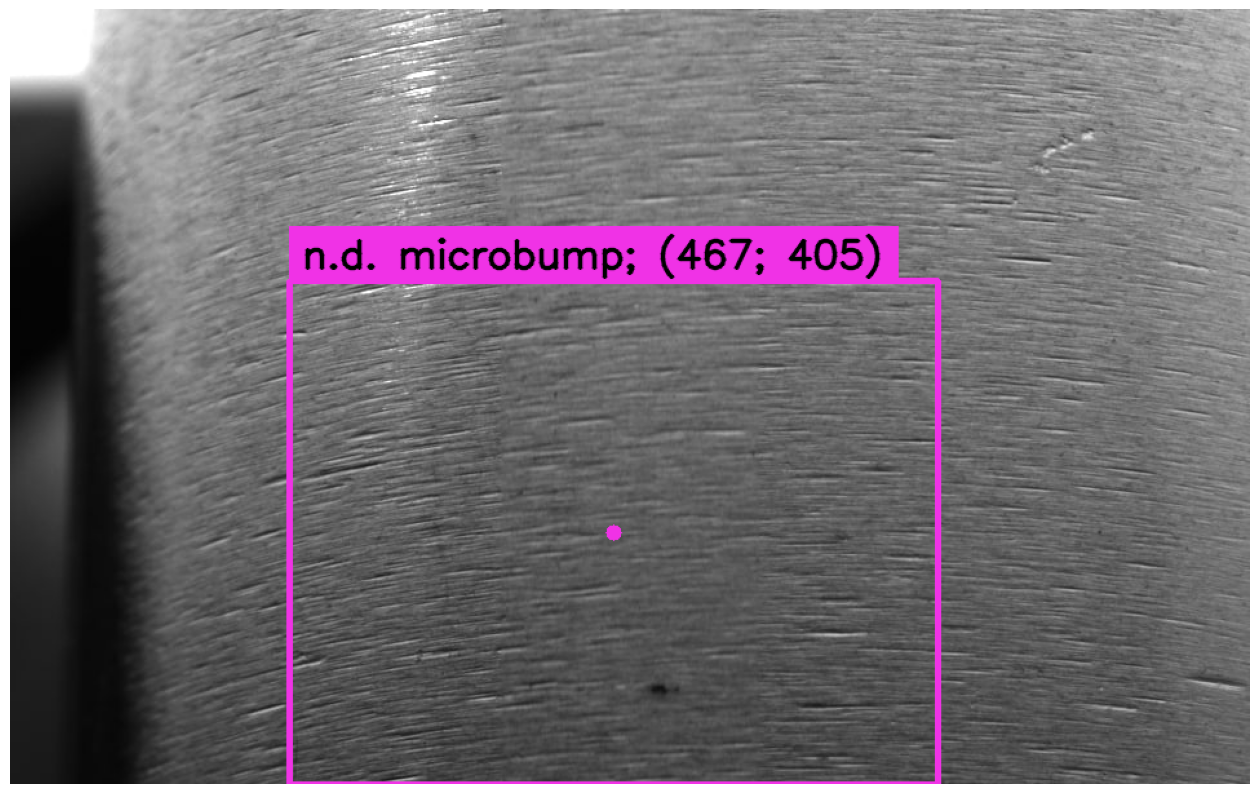

In [16]:
%matplotlib inline
sv.plot_image(ann_img, (16, 16))

In [17]:
path_to_image = '/content/photo_2023-12-17_01-05-12.jpg'

In [21]:
preds = model_1(path_to_image, conf=0.4)[0]


image 1/1 /content/photo_2023-12-17_01-05-12.jpg: 416x640 2 cracks, 1 mud, 12.7ms
Speed: 2.4ms preprocess, 12.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 640)


In [19]:
ann_img = draw_boxes_sv(path_to_image, preds, CLASS_NAMES_DICT)

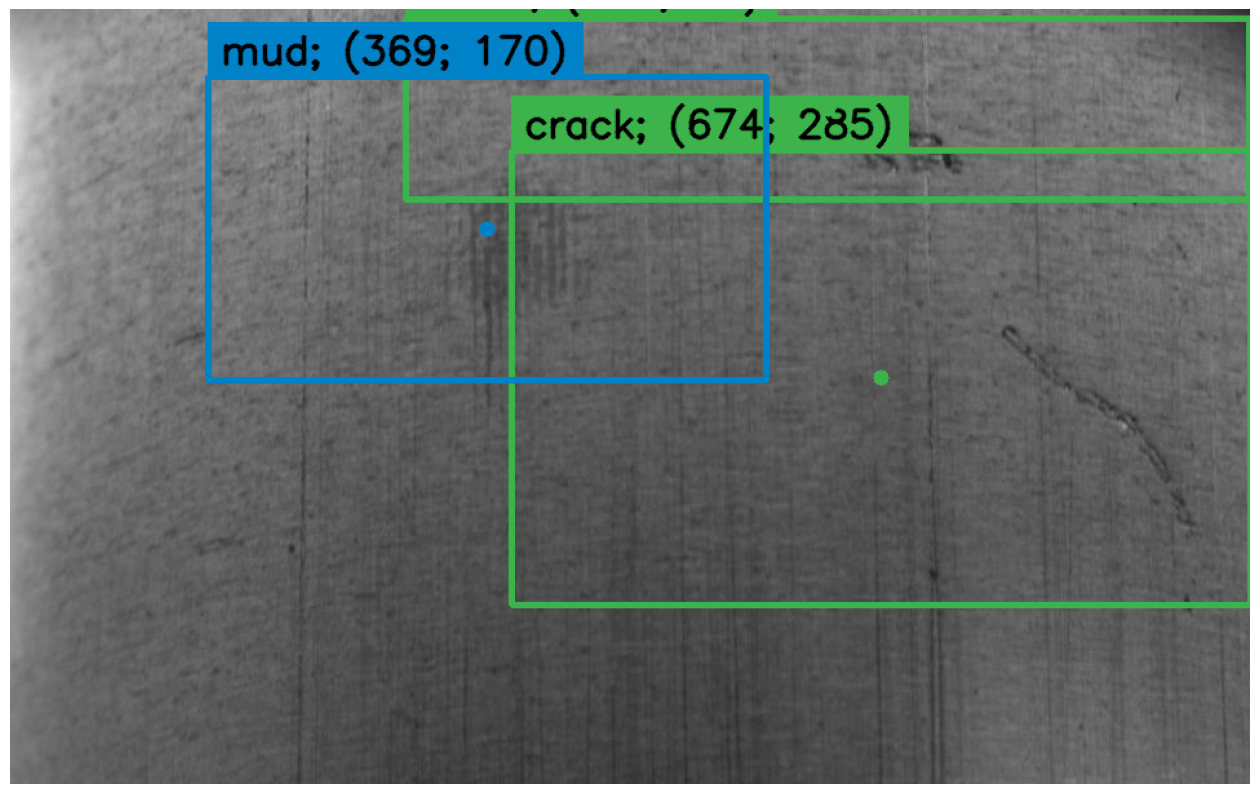

In [20]:
%matplotlib inline
sv.plot_image(ann_img, (16, 16))